<a href="https://colab.research.google.com/github/ra2309/AIWorkshop/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

First, we import all libraries we need in one cell.

In [ ]:
!pip install lasio

In [ ]:
from google.colab import drive # for reading
import os # for reading
import lasio # for reading
import pandas as pd # for preprocessing
import seaborn as sns # for graphing
import matplotlib.pyplot as plt # for graphing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler # for scaling
from sklearn.impute import KNNImputer # for missing values
from sklearn.model_selection import train_test_split # for model selection
from sklearn.linear_model import LinearRegression # for training
from sklearn.tree import DecisionTreeRegressor # for training
import xgboost as xgb # for training
from sklearn.model_selection import RandomizedSearchCV # for hyperparamters
import numpy as np # for preprocessing
from sklearn.decomposition import PCA # for dimension reduction
import torch # for deep learning
import torch.nn as nn # for deep learning
import torch.optim as optim # for deep learning

# Reading Data

This section is related to reading and mounting data from Google Drive.

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('drive/MyDrive/Welllogs')

The first step after mounting data is to ignest them. In most industries, it is suffcieient to read only csv, excel and other formats. In oil/gas industry, there are, however, many file formats not readable naturally by pandas or numpy. Thus, we utilize 3rd party libraries like lasio to read las files. We start by installing lasio.

For the purpose of testing mounting and ingestion, we read one sample file.

In [6]:
las=lasio.read('1052987184.las')

lasio library enables to transform data into a pandas dataframe.

In [ ]:
df = las.df()

In [ ]:
df.head()

,ABHV,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,TBHV,MEL15,MEL20,MELCAL
DEPT,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,22.9799,NaN,NaN,100000.0,1.0667,2062.7507,151.6998,-91.4477,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,24.3601,NaN,NaN,100000.0,4.0241,3293.4761,133.4111,-66.0708,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,26.1486,NaN,NaN,100000.0,100000.0000,3339.4282,132.8695,-55.1717,NaN,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,28.5913,NaN,NaN,100000.0,100000.0000,3339.6782,132.8666,-50.0492,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,31.5497,NaN,NaN,100000.0,100000.0000,3339.6782,132.8666,-47.8064,NaN,NaN,NaN,NaN


Now, we go ahead and read whole set of data. We create an empty list of dataframes where we will append single dataframe read from las.

In [ ]:
dfs = []
for file in os.listdir():
  print(file)
  las = lasio.read(file)
  df = las.df()
  dfs.append(df)

1052987184.las
1052987195.las
1052987201.las
1052987218.las
1052987223.las
1052987227.las
1052987231.las
1052987237.las
1052987257.las
1052997244.las
1053009232.las
1053011951.las
1053014529.las
1053017310.las
1053051790.las
1053051791.las
1053051799.las
1053051804.las
1053076196.las
1053076205.las
1053076219.las
1053076225.las
1053136713.las
1053145757.las
1053192852.las
1053192858.las
1053225933.las
1053230972.las
1053239547.las
1053239553.las
1053240861.las
1053240866.las
1053240894.las
1053240902.las
1053243844.las
1053243845.las
1053243853.las
1053243854.las
1053243857.las
1053244666.las
1053246764.las
1053247619.las
1053251243.las
1053251247.las
1053251280.las
1053253945.las
1053253979.las
1053262500.las
1053262508.las
1053263309.las
1053263319.las
1053264006.las
1053268121.las
1053271825.las
1053271839.las
1053271848.las
1053271856.las
1053271865.las
1053276018.las
1053281971.las
1053282080.las
1053282085.las
1053285821.las
1053286544.las
1053292672.las


KeyError: ignored

We discovered an error which is a natural situation in automation and machine learning workflow. I printed list of files and shown the file that is troublesome. Now, if we open it with a text editor we will clearly see the error reason. We try one more time this time with try and except. In addition, to identify different wells from each other in this dataframe, we record name of the well.

In [7]:
dfs = []
for file in os.listdir():
  try:
    las = lasio.read(file)
    df = las.df()
    df['WELL'] = file.split('.las')[0]
    dfs.append(df)
  except Exception as e:
    print(file)
    print(e)

1053292672.las
'No ~ sections found. Is this a LAS file?'


Now, we convert list of dfs into a one single dataframe with a command called concat.

In [8]:
df = pd.concat(dfs)

# EDA

In [7]:
df.describe()

,ABHV,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,...,DPHL,PEF,NPHL,PXND,MINV,MNOR,DPHS,NPHS,DPHD,NPHD
count,137493.000000,382507.000000,438320.000000,430143.000000,573870.000000,388833.000000,429901.000000,681552.000000,681713.000000,680997.000000,...,4478.000000,4473.000000,4458.000000,4458.000000,4438.000000,4438.000000,4478.000000,4458.000000,4478.000000,4458.000000
mean,370.746050,21.099013,5.912026,83.178145,72.081446,1.611399,0.085377,1591.842291,4666.444287,61.817155,...,0.066774,3.850526,0.129283,0.112766,20.645875,17.392316,0.029899,0.160015,0.149805,0.107702
std,307.858817,11.402174,3.870955,1850.792462,39.718633,25.485010,0.108801,12446.531850,21057.604061,1146.770384,...,0.054800,0.632465,0.091031,0.070958,21.596368,18.095362,0.056966,0.096605,0.049924,0.078123
min,0.000000,-50.000000,-56.144300,-308.766800,1.146600,-999.140000,-3.714400,0.131100,0.199200,-12.302700,...,-0.030000,1.964800,0.013800,0.010600,0.394100,0.795900,-0.070700,0.038200,0.061700,0.006000
25%,162.557800,11.255050,0.808800,6.849500,42.911600,2.048800,0.031200,3.209800,3.019800,4.527300,...,0.024400,3.388900,0.056600,0.053600,4.980300,4.275900,-0.014100,0.082900,0.111200,0.045300
50%,273.229500,21.264700,7.854200,13.476500,69.069000,2.453000,0.067500,5.534100,5.106300,7.748800,...,0.053350,3.798300,0.102350,0.095500,10.695150,9.331850,0.015900,0.131200,0.137550,0.086000
75%,480.688000,30.213900,8.158300,34.556400,94.701475,2.583900,0.120900,11.639225,11.399400,18.112000,...,0.094400,4.328500,0.178600,0.156475,31.255125,25.038225,0.058600,0.211100,0.175000,0.149400
max,1520.314300,100.000000,96.950000,58595.652300,1534.622200,7.989900,1.717500,100000.000000,100000.000000,100000.000000,...,0.304300,5.810800,0.498200,0.350500,143.002000,114.609200,0.276800,0.538600,0.366200,0.433900


In [8]:
df.head()

,ABHV,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,...,DPHL,PEF,NPHL,PXND,MINV,MNOR,DPHS,NPHS,DPHD,NPHD
DEPT,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,22.9799,NaN,NaN,100000.0,1.0667,2062.7507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,24.3601,NaN,NaN,100000.0,4.0241,3293.4761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,26.1486,NaN,NaN,100000.0,100000.0000,3339.4282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,28.5913,NaN,NaN,100000.0,100000.0000,3339.6782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,31.5497,NaN,NaN,100000.0,100000.0000,3339.6782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We check number of columns that are there.

In [9]:
df.columns

Index(['ABHV', 'CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM',
       'RLL3', 'RXORT', 'SP', 'TBHV', 'MEL15', 'MEL20', 'MELCAL', 'WELL',
       'MINMK', 'PE', 'AVTX', 'BVTX', 'DT', 'ITT', 'SPOR', 'CILD', 'CNDL',
       'CNLS', 'CNSS', 'LSPD', 'LTEN', 'MCAL', 'MI', 'MN', 'DEVI', 'DTMP',
       'NPOR', 'GK1', 'IA10_2', 'IA20_2', 'IA30_2', 'IA60_2', 'IA90_2',
       'CIA90_2', 'RXO_2', 'RT_2', 'CALI', 'DRHO', 'DPHL', 'PEF', 'NPHL',
       'PXND', 'MINV', 'MNOR', 'DPHS', 'NPHS', 'DPHD', 'NPHD'],
      dtype='object')

We run count to check number of missing values there. In addition, we compare that to shape of array.

In [10]:
df.shape

(693010, 57)

In [11]:
df.count()

ABHV       137493
CNPOR      382507
DCAL       438320
DPOR       430143
GR         573870
RHOB       388833
RHOC       429901
RILD       681552
RILM       681713
RLL3       680997
RXORT      301043
SP         690601
TBHV        84687
MEL15      114231
MEL20      114225
MELCAL     151083
WELL       693010
MINMK       86552
PE         112169
AVTX       338593
BVTX       338593
DT         262227
ITT        262237
SPOR       262227
CILD       221297
CNDL       219252
CNLS       219252
CNSS       219252
LSPD       221296
LTEN       213403
MCAL       215853
MI         221926
MN         221926
DEVI        71467
DTMP        65039
NPOR        45242
GK1        111916
IA10_2       9391
IA20_2       9391
IA30_2       9391
IA60_2       9391
IA90_2       9391
CIA90_2      9391
RXO_2        9391
RT_2         9391
CALI         4484
DRHO         4478
DPHL         4478
PEF          4473
NPHL         4458
PXND         4458
MINV         4438
MNOR         4438
DPHS         4478
NPHS         4458
DPHD      

In [12]:
(df.count()/len(df))>.6

ABHV       False
CNPOR      False
DCAL        True
DPOR        True
GR          True
RHOB       False
RHOC        True
RILD        True
RILM        True
RLL3        True
RXORT      False
SP          True
TBHV       False
MEL15      False
MEL20      False
MELCAL     False
WELL        True
MINMK      False
PE         False
AVTX       False
BVTX       False
DT         False
ITT        False
SPOR       False
CILD       False
CNDL       False
CNLS       False
CNSS       False
LSPD       False
LTEN       False
MCAL       False
MI         False
MN         False
DEVI       False
DTMP       False
NPOR       False
GK1        False
IA10_2     False
IA20_2     False
IA30_2     False
IA60_2     False
IA90_2     False
CIA90_2    False
RXO_2      False
RT_2       False
CALI       False
DRHO       False
DPHL       False
PEF        False
NPHL       False
PXND       False
MINV       False
MNOR       False
DPHS       False
NPHS       False
DPHD       False
NPHD       False
dtype: bool

We select columns that are mostly filled.

In [9]:
cols_to_delete = df.columns[df.isnull().sum()/len(df) > .60]

In [10]:
df.drop(cols_to_delete, axis = 1, inplace = True)

<ipython-input-11-748c49e9e4c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


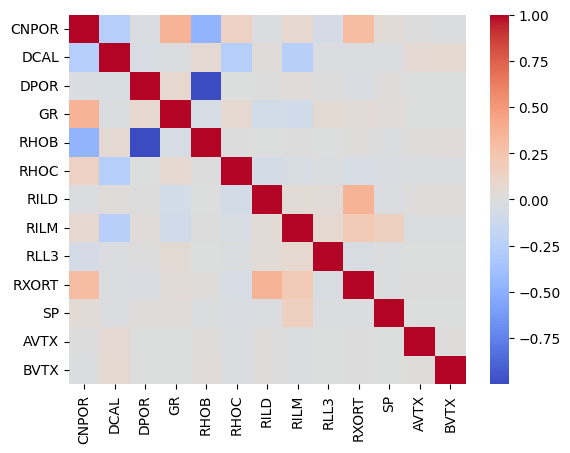

In [11]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

# Missing Values

Now, we need to take care of missiing values. One way is to interpolate values to nearest value.

In [12]:
lst = df.columns.tolist()
lst.remove('WELL')
lst.remove('GR')

In [17]:
for c in lst:
  df[c]=df.groupby('WELL',group_keys=False)[c].apply(lambda group: group.interpolate())

In [18]:
df.count()

CNPOR    387744
DCAL     441593
DPOR     433964
GR       573870
RHOB     392108
RHOC     433918
RILD     682086
RILM     681733
RLL3     681976
RXORT    301230
SP       691801
WELL     693010
AVTX     338691
BVTX     338691
dtype: int64

Another way is fo fillna for each well with the median/mode/mean value in each well.

In [19]:
for c in lst:
  df[c].fillna(df.groupby('WELL')[c].transform('median'),inplace=True)

Anohter way is to use knn-imputer which predicts missing values using KNN algorithm. However, it is much slower than other methods. Therefore, we will train on a sample of 1000 and propogate it into whole population.

In [13]:
df.dropna(subset='GR',inplace=True)

In [17]:
df_s = df.sample(1000)

In [18]:
imputer = KNNImputer()
df_s[lst] = imputer.fit_transform(df_s[lst])

In [20]:
df[lst] = imputer.transform(df[lst])

In [21]:
df.count()

CNPOR    573870
DCAL     573870
DPOR     573870
GR       573870
RHOB     573870
RHOC     573870
RILD     573870
RILM     573870
RLL3     573870
RXORT    573870
SP       573870
WELL     573870
AVTX     573870
BVTX     573870
dtype: int64

That worked for some values. What reamains is to fill with global median for each value.

In [20]:
for c in lst:
  df[c].fillna(df[c].median(),inplace=True)

In [21]:
df.count()

CNPOR    693010
DCAL     693010
DPOR     693010
GR       573870
RHOB     693010
RHOC     693010
RILD     693010
RILM     693010
RLL3     693010
RXORT    693010
SP       693010
WELL     693010
AVTX     693010
BVTX     693010
dtype: int64

Our target variable is supposed to be GR. It is best not to fill it and instead drop any values that are empty in that column.

In [22]:
df.dropna(subset='GR',inplace=True)

# Scaling

Now, we want to use scaling on these values. There is standard scaler and minmax scaler, and robust scaler. There are also other types not covered in this workshop. Standard scaler is easy to implement which also applies to minmax. The difference is that standard scaler will turn mean to 0 with 1 unit variance which in some cases we would like to avoid so we use minmax scaler. However, both assume dataset is normally distributed. However, robust scaler avoids that and capable of transforming data that is not normally distributed. MaxABs sclaer shift data using absolute value of each feature to [-1,1].

In [25]:
std = StandardScaler()

In [26]:
minmax = MinMaxScaler()

In [24]:
rc = RobustScaler()

In [43]:
maxabs = MaxAbsScaler()

In [28]:
df.reset_index(inplace=True)

In [29]:
lst.append('DEPT')

In [31]:
std_features = std.fit_transform(df[lst])

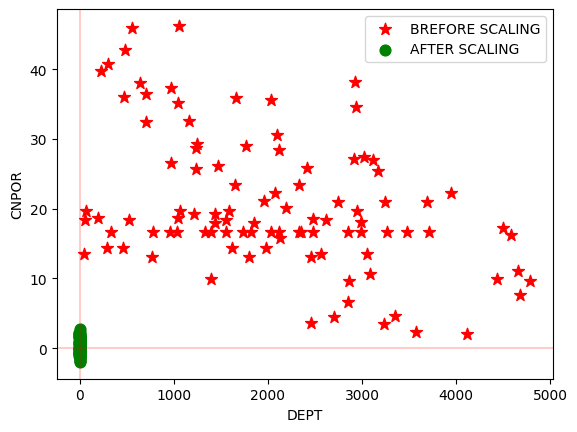

In [49]:
df1 = pd.DataFrame(std_features,columns=lst)
df1_s = df1.sample(100)
df_s = df.sample(100)
ax = df_s.plot.scatter(x='DEPT', y='CNPOR',color=['red'], marker = '*',s=80, label='BREFORE SCALING');
df1_s.plot.scatter(x='DEPT', y='CNPOR', color=['green'],marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

In [32]:
minmax_features = minmax.fit_transform(df[lst])

In [34]:
lst

['CNPOR',
 'DCAL',
 'DPOR',
 'RHOB',
 'RHOC',
 'RILD',
 'RILM',
 'RLL3',
 'RXORT',
 'SP',
 'AVTX',
 'BVTX',
 'DEPT']

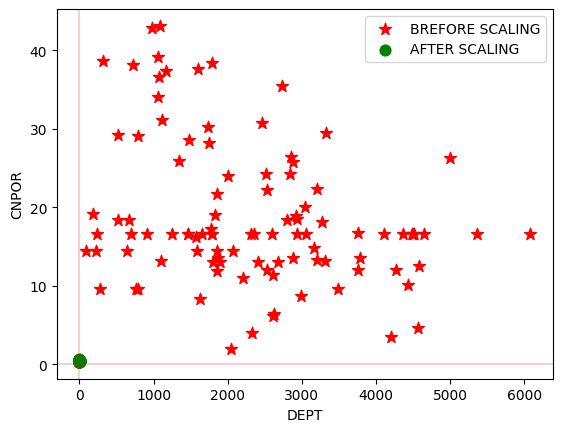

In [46]:
df1 = pd.DataFrame(minmax_features,columns=lst)
df1_s = df1.sample(100)
df_s = df.sample(100)
ax = df_s.plot.scatter(x='DEPT', y='CNPOR',color=['red'], marker = '*',s=80, label='BREFORE SCALING');
df1_s.plot.scatter(x='DEPT', y='CNPOR', color=['green'],marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

In [25]:
rc_features = rc.fit_transform(df[lst])

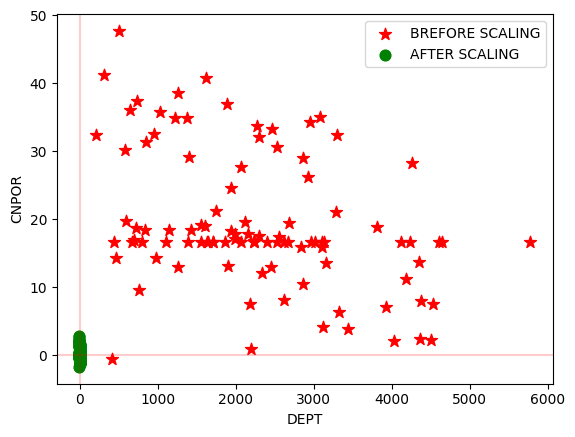

In [47]:
df1 = pd.DataFrame(rc_features,columns=lst)
df1_s = df1.sample(100)
df_s = df.sample(100)
ax = df_s.plot.scatter(x='DEPT', y='CNPOR',color=['red'], marker = '*',s=80, label='BREFORE SCALING');
df1_s.plot.scatter(x='DEPT', y='CNPOR', color=['green'],marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

In [44]:
maxabs_features = maxabs.fit_transform(df[lst])

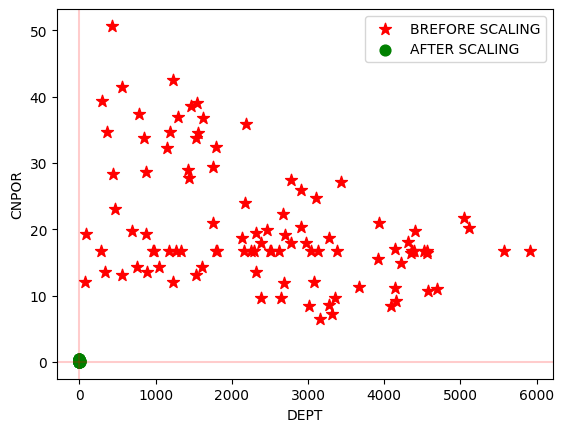

In [48]:
df1 = pd.DataFrame(maxabs_features,columns=lst)
df1_s = df1.sample(100)
df_s = df.sample(100)
ax = df_s.plot.scatter(x='DEPT', y='CNPOR',color=['red'], marker = '*',s=80, label='BREFORE SCALING');
df1_s.plot.scatter(x='DEPT', y='CNPOR', color=['green'],marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

In [27]:
data = pd.DataFrame(rc_features,index=df.index,columns=lst)

In [28]:
data['GR'] = df['GR']

# ML

We choose a label, let's say GR. We drop it from X and use it in y.

In [29]:
my_train_lst = data.columns.tolist()

In [53]:
X = data.drop('GR',axis=1)
y = data['GR']

We train test split data. Training set means the set we will look at all the time during training while testing set is the sample of data I will never look into. This is to check, does the algorithm work well with data never seen before.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

Since GR is continues, we need to select a regression model. Let's try linear regression.

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.10937336123796237

That was awful. It is usual for decision tree to work well with well logs.

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8388938464922862

Another good algorithm is xgboost but it requires hyperparemeter tuning.

In [ ]:
reg = xgb.XGBRegressor()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.6284939321599494

Now, we perfrom randomized search tree for sake of time. There is also grid search. The difference between two is grid search searches over all hyperparmeters. It is time consuming but will reach optimal results compared to randomized search. Randomized search is much faster which selects random hyperparmters. I advise to use randomized search first then grid search on few hyperparematers.

In [ ]:
params = {'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

I run randomized search with cv=5. This means how many random samplings of train valid split I will do with the compute in a single iteration. Scoring here I used r2 which is a measure of accuracy. I could use MSE, RMSE, MAE on other things.

In [ ]:
rs_model=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,scoring='r2',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [ ]:
rs_model.cv_results_

{'mean_fit_time': array([198.7408752 , 299.43214898,  90.67391682,  42.32047143,
        151.5681766 ]),
 'std_fit_time': array([11.00716488,  4.00195815,  0.81949295,  0.46567921, 21.94616565]),
 'mean_score_time': array([3.63930688, 1.86459208, 0.40070491, 0.24365067, 1.04134655]),
 'std_score_time': array([1.02187753, 0.37134148, 0.02748577, 0.07769393, 0.29570219]),
 'param_min_child_weight': masked_array(data=[1, 7, 3, 5, 3],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[15, 15, 6, 3, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.25, 0.3, 0.15, 0.15, 0.15],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.4, 0.3, 0.2, 0.0, 0.0],
              mask=[False, False, False, False, F

In [ ]:
rs_model.best_estimator_.score(X_test,y_test)

0.7967395689412567

# Inference

Now, we graph predicted results for a single well.

In [ ]:
df.columns

Index(['DEPT', 'CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM',
       'RLL3', 'RXORT', 'SP', 'WELL', 'AVTX', 'BVTX'],
      dtype='object')

In [ ]:
df.WELL.unique()

array(['1052987184', '1052987195', '1052987201', '1052987218',
       '1052987223', '1052987227', '1052987231', '1052987237',
       '1052987257', '1052997244', '1053009232', '1053011951',
       '1053014529', '1053017310', '1053051804', '1053076196',
       '1053076205', '1053076219', '1053076225', '1053145757',
       '1053192852', '1053192858', '1053225933', '1053230972',
       '1053239547', '1053239553', '1053240866', '1053243844',
       '1053243845', '1053243853', '1053243854', '1053244666',
       '1053246764', '1053251243', '1053251247', '1053251280',
       '1053253945', '1053253979', '1053262500', '1053262508',
       '1053263309', '1053263319', '1053264006', '1053271825',
       '1053271839', '1053271848', '1053271856', '1053271865',
       '1053281971', '1053282080', '1053282085', '1053285821',
       '1053286544', '1053295419', '1053295426', '1053295431',
       '1053318615', '1053318721', '1053318726', '1053318743',
       '1053318746', '1053318752', '1053318756'], dtype

In [ ]:
df_w = df[df['WELL']=='1053243854']

In [ ]:
my_train_lst.remove('GR')

In [ ]:
s = scaler.transform(df_w[my_train_lst])

In [ ]:
w = pd.DataFrame(df_w,columns=my_train_lst)

In [ ]:
w['GRy'] = dt.predict(w)

In [ ]:
w['GR'] = df_w['GR']

<ipython-input-140-72802664d153>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)


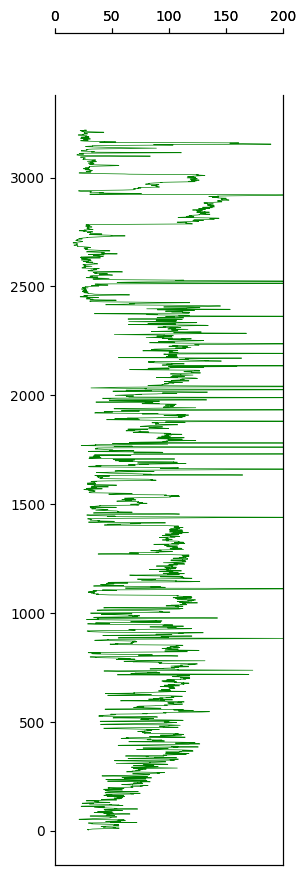

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma', 'Pred-Gamma']


#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = ax1.twiny()


#Set up the individual log tracks / subplots
ax1.plot("GR", "DEPT", data = w, color = "green", lw = 0.5)
ax1.set_xlim(0, 200)

ax2.plot("GRy", "DEPT", data = w, color = "red", lw = 0.5)
ax2.set_xlim(0, 200)

#Set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    #ax.set_ylim(4700, 3500) # Set the depth range

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    #ax.set_xlabel(curve_names[i])
    ax.spines["top"].set_position(("axes", 1.08))


#Reduce the space between each subplot
plt.show()

# Dimensionality Reduction

It can be used to reduce dimensions of a big dataset (seismic) for example. Here we will try it for sake of demo.

In [ ]:
df_pca = df.drop(['WELL','GR'],axis=1)

One thing about PCA is you need to select number of componenets. Explained variance ratio shows how much can be explained from the features. Here it doesn't make sense since number of features is very low. However, if you are working with seismic with many features there, you would need definitly PCA to try to reduce data dimensioin. But, you will lose explaination about what featues went into training and what features effected computation most.

In [ ]:
pca = PCA(n_components=5)
pca.fit(df_pca)
var = pca.explained_variance_ratio_
print(var)

[7.56604199e-01 2.38395498e-01 2.85084993e-03 1.38172878e-03
 5.51681647e-04]


# DL
Here we will perform deep learning methods such as ANN and RNN (LSTM) on time series data. We start by loading data.

In [32]:
X = data.drop('GR',axis=1)
y = data['GR']

Pytorch or tensorflow work by ingesting data as a Tensor. A tensor is a unit in GPU that optimizes computation as deep learning is most relevant to usage of GPU in order to perform matrix multiplication efficiently.

In [34]:
X = torch.tensor(X.to_numpy(), dtype=torch.float32)
y = torch.tensor(y.to_numpy(), dtype=torch.float32).reshape(-1, 1)

In [35]:
X.shape

torch.Size([573870, 12])

Below is code base for simple Artificial Neural Network. Notice we have 1 input layer and one hidden layer. The more layers you have the more complex the network becomes. However, it is not necessary means you will arrive at good solution. Sometimes, deep networks are guilty of overfitting meaning they know how to solve training set but unable to solve for test set. Notice we used Relu which is an algorithm that will normalize output.

In [40]:
class ANNRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(12, 24) # notice I used number of features as input shape
        self.act1 = nn.ReLU()
        self.hidden = nn.Linear(24, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.act1(self.input(x))
        x = self.act2(self.hidden(x))
        x = self.output(x)
        return x

model = ANNRegressor()
print(model)

ANNRegressor(
  (hidden1): Linear(in_features=12, out_features=24, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=24, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


Long Short term memory cell is an advancment in deep learning. The idea is that this cell will memorize previous steps and use them in calculation. Unlike previous one where we explicitly used Relu, here the cell will use tanh to normalize output.

In [52]:
class LSTMRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(12, 24) # same here using number of features as input
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(24, 8)
        self.lstm = nn.LSTM(input_size=8, hidden_size=50, num_layers=1, batch_first=True)
        self.hidden3 = nn.Linear(50,8)
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act1(self.hidden2(x))
        x,_ = self.lstm(x)
        x = self.act1(self.hidden3(x))
        x = self.output(x)
        return x

model = LSTMRegressor()
print(model)

LSTMRegressor(
  (hidden1): Linear(in_features=12, out_features=24, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=24, out_features=8, bias=True)
  (lstm): LSTM(8, 50, batch_first=True)
  (hidden3): Linear(in_features=50, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)


Loss function is an important concept in deep learning. Means how to measure loss (gradient descent value). For regression, it is common to use Mean square error. While for classification, it is common to use cross entropy.

Another somewhat important concept is optimizer. It is necessary to use optimizer to know how to behave in gradient descent. It is common to use Adam, RMSprop, and other fuctions that utilize learning rate. The smaller the learning rate the slower the function becomes. However, it is more guranteed to reach optimal result.

In [53]:
loss_fn = nn.MSELoss()  # mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

Here we have epochs which is a term for how many times we iterate and try to solve again. Batch size is how many data points will go into tensor. The larger the more inefficient computation becomes.

In [54]:

n_epochs = 100
batch_size = 128

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 905.7606201171875
Finished epoch 1, latest loss 867.7628173828125
Finished epoch 2, latest loss 865.16259765625
Finished epoch 3, latest loss 867.310546875
Finished epoch 4, latest loss 822.4961547851562
Finished epoch 5, latest loss 845.9738159179688
Finished epoch 6, latest loss 812.5929565429688
Finished epoch 7, latest loss 779.4234619140625
Finished epoch 8, latest loss 735.7471923828125
Finished epoch 9, latest loss 798.935546875
Finished epoch 10, latest loss 814.2783813476562
Finished epoch 11, latest loss 847.68896484375
Finished epoch 12, latest loss 888.4815673828125
Finished epoch 13, latest loss 905.7279052734375
Finished epoch 14, latest loss 936.7615356445312
Finished epoch 15, latest loss 971.9105224609375
Finished epoch 16, latest loss 935.9447021484375


KeyboardInterrupt: ignored